### Тема “Обучение без учителя”
##### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.datasets import load_boston    # Импортируем датасет
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [3]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

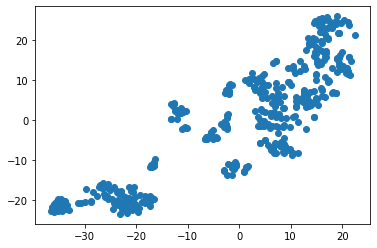

In [4]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

##### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)

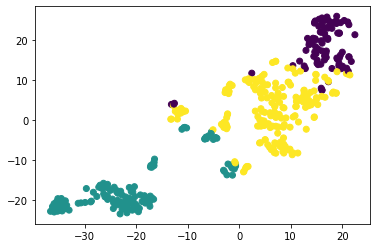

In [6]:
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [7]:
y_train[labels_train == 0].mean() #Среднее значение цены

price    27.788372
dtype: float64

In [8]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [9]:
y_train[labels_train == 2].mean()

price    24.958115
dtype: float64

In [10]:
X_train.loc[labels_train == 0, 'CRIM'].mean() #Среднее значение CRIM

0.07356558139534886

In [11]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196853

In [12]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.42166020942408367

##### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

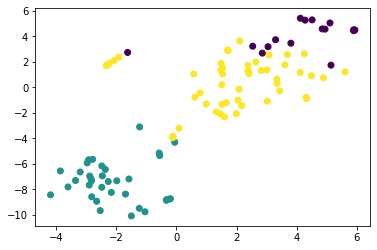

In [13]:
labels_test = model.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [14]:
y_test[labels_test == 0].mean() #Среднее значение цены

price    31.35
dtype: float64

In [15]:
y_test[labels_test == 1].mean()

price    16.437143
dtype: float64

In [16]:
y_test[labels_test == 2].mean()

price    21.860784
dtype: float64

In [17]:
X_test.loc[labels_test == 0, 'CRIM'].mean() #Среднее значение CRIM

0.062060000000000004

In [18]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

10.165531142857143

In [19]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.26607882352941176